In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))
suppressMessages(library(ChIPseeker))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
suppressMessages(library(org.Hs.eg.db))
suppressMessages(library(GenomicRanges))
suppressMessages(library(writexl))
suppressMessages(library(anndata))
suppressMessages(library(reticulate))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_T", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
rna_T <- readRDS(file = "/data/hanxue/BCY_ATAC/scRNA_T.rds")

In [ ]:
rna_T$`anno-subT`

In [11]:
# 整合 scATAC-seq 和 scRNA-seq 数据
proj <- addGeneIntegrationMatrix(
  ArchRProj = proj,
  useMatrix = "GeneScoreMatrix",  # scATAC-seq 的基因评分矩阵
  matrixName = "GeneIntegrationMatrix",  # 输出矩阵名称
  reducedDims = "IterativeLSI",  # scATAC-seq 的降维结果
  seRNA = rna_T,  # scRNA-seq 的 Seurat 对象
  addToArrow = FALSE,  # 将结果保存到 Arrow 文件
  groupRNA = "anno-subT",  # scRNA-seq 中细胞类型的列名
  nameCell = "predictedCell",  # 存储匹配的 scRNA-seq 细胞 ID
  nameGroup = "predictedGroup",  # 存储预测的细胞类型
  nameScore = "predictedScore",  # 存储整合得分
  sampleCellsATAC = 10000,  # 采样 scATAC-seq 细胞数
  sampleCellsRNA = 10000,  # 采样 scRNA-seq 细胞数
  dimsToUse = 1:30,  # 使用的前 30 个降维维度
  force = TRUE  # 强制覆盖现有矩阵
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-341b4843830f49-Date-2025-04-30_Time-02-23-47.640982.log
If there is an issue, please report to github with logFile!



2025-04-30 02:23:47.708115 : Running Seurat's Integration Stuart* et al 2019, 0.001 mins elapsed.

2025-04-30 02:23:47.731394 : Checking ATAC Input, 0.001 mins elapsed.

2025-04-30 02:23:48.690242 : Checking RNA Input, 0.017 mins elapsed.

2025-04-30 02:23:56.278551 : Found 20181 overlapping gene names from gene scores and rna matrix!, 0.144 mins elapsed.

2025-04-30 02:23:56.282695 : Creating Integration Blocks, 0.144 mins elapsed.

2025-04-30 02:23:57.094053 : Prepping Interation Data, 0.158 mins elapsed.

subThreading Disabled since ArchRLocking is TRUE see `addArchRLocking`

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-04-30 02:23:58.52184 : Computing Integration in 2 Integration Blocks!, 0 mins elapsed.

2025-04-30 02:23:58.525607 : Block (1 of 2) : Computing Integration, 0 mins elapsed.

2025-04-30 02:24:00.910604 : Block (1 of 2) : Identifying Variable Genes, 0.04 mins elapsed.

2025-04-30 02:24:02.924118 : Block (1 of 2) : Getting GeneScoreMatrix, 0.073 mins ela

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-341b486479339e-Date-2025-04-30_Time-02-30-39.472368.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-341b486479339e-Date-2025-04-30_Time-02-30-39.472368.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-341b4877e0bf77-Date-2025-04-30_Time-02-30-40.00546.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-341b4877e0bf77-Date-2025-04-30_Time-02-30-40.00546.log



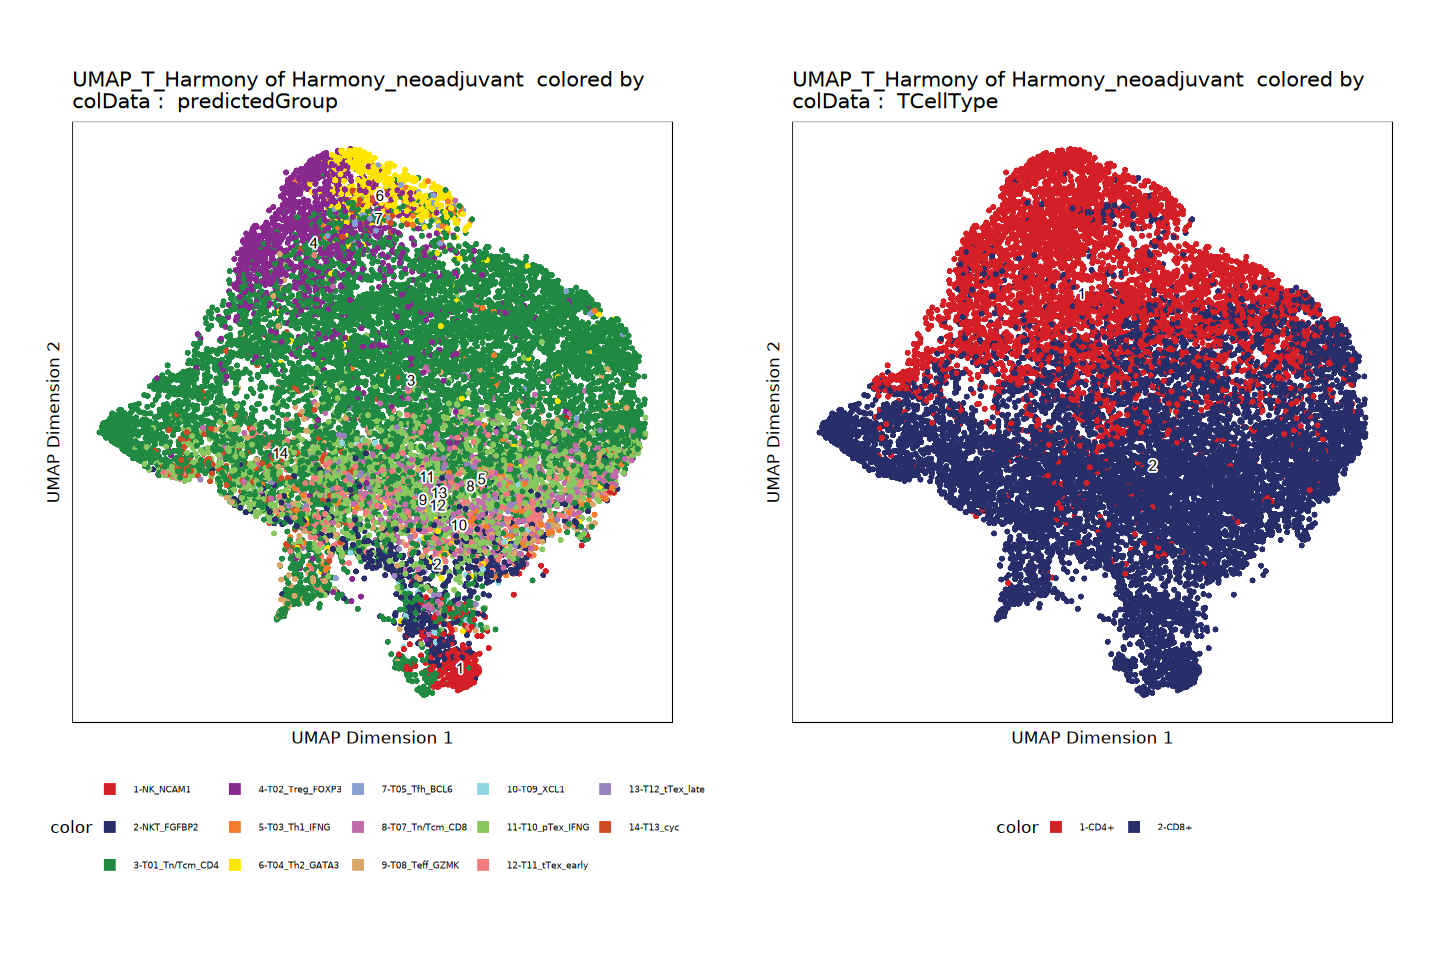

In [12]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
  ArchRProj = proj,
  colorBy = "cellColData",
  name = "predictedGroup",
  embedding = "UMAP_T_Harmony",
  size = 1.5,
  labelsize = 6
)

p2 <- plotEmbedding(
  ArchRProj = proj,
  colorBy = "cellColData",
  name = "TCellType",
  embedding = "UMAP_T_Harmony",
  size = 1.5,
  labelsize = 6
)
ggAlignPlots(p1, p2,type = 'h')

In [13]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] future_1.40.0                           
 [2] reticulate_1.42.0                       
 [3] anndata_0.7.5.6                         
 [4] writexl_1.5.4            